In [2]:
import pandas as pd
df = pd.read_csv('../../raw_data/adni_add.raw', sep='\s+', engine='python')


In [3]:
df.columns = [col.split('_')[0] for col in df.columns]

In [10]:
adni_snps = df.columns.tolist()

In [4]:
df[[col for col in df.columns if col.startswith('rs')]]

,rs12354060,rs2691310,rs2531266,rs4124251,rs8179466,rs6603779,rs28446478,rs12029736,rs12184279,rs2977656,...,rs34851597,rs28814596,rs306934,rs306910,rs17653586,rs1764581,rs6567787,rs5983854,rs3093477,rs28415761
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,0,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0,0.0,0.0,0.0,1.0,1.0,2.0,0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,1.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0,NaN
753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0,0.0,0.0,0.0,0.0,2.0,2.0,0,NaN
754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0,0.0,0.0,1.0,1.0,1.0,2.0,0,NaN
755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,1.0,0,0.0,0.0,2.0,0.0,1.0,2.0,0,NaN


In [6]:
# getting snps
ukb_lde_df = pd.read_parquet('../ukb/snp_parquets/raw_unlinkedsnps_AD.parquet', engine = 'fastparquet') # LDE snps


In [7]:
lde_snps = ukb_lde_df.columns.str.split('_').str[0].tolist()

In [11]:
overlap_snps = set(lde_snps) & set(adni_snps)
print(f"Number of overlapping SNPs: {len(overlap_snps)}")
# Optionally, display the first few overlapping SNPs
print(list(overlap_snps)[:10])

Number of overlapping SNPs: 77
['rs9571250', 'rs3822030', 'rs1575241', 'rs11754661', 'rs746748', 'rs1697421', 'rs2970989', 'MAT', 'rs7529220', 'rs717097']


In [ ]:
# "demographics_lancet2024":
#             [
#                 "curr_age",
#                 "31-0.0",
#                 "845-0.0",
#                 "21000-0.0",
#             ]   

# lancet_vars = [
#         "4700-0.0",
#         "5901-0.0",
#         "30780-0.0",
#         "head_injury",
#         "22038-0.0",
#         "20161-0.0",
#         "alcohol_consumption",
#         "hypertension",
#         "obesity",
#         "diabetes",
#         "hearing_loss",
#         "depression",
#         "freq_friends_family_visit",
#         "24012-0.0",
#         "24018-0.0",
#         "24019-0.0",
#         "24006-0.0",
#         "24015-0.0",
#         "24011-0.0",
#         "2020-0.0_-3.0",
#         "2020-0.0_-1.0",
#         "2020-0.0_0.0",
#         "2020-0.0_1.0",
#         "2020-0.0_nan",
#     ]
# continuous_lancet_vars = [
#     "4700-0.0",
#     "5901-0.0",
#     "30780-0.0",
#     "22038-0.0",
#     "20161-0.0",
#     "24012-0.0",
#     "24018-0.0",
#     "24019-0.0",
#     "24006-0.0",
#     "24015-0.0",
#     "24011-0.0",
# ]

In [ ]:
apoe = {
    '3/3' : 'e3/e4',
    '3/4' : 'e3/e4',
    '4/4' : 'e4/e4',
    '2/4' : 'e2/e4',
    '2/3' : 'e2/e3',
    '2/2' : 'e2/e2',
}

In [10]:
import pandas as pd
main_path = "../../../../randy/rfb/raw_data/ADNI/"

dx_path = main_path + "Diagnosis/DXSUM_06Mar2025.csv" # diagnosis of AD
apoe_path = main_path + "Demographics/APOERES_06Mar2025.csv"
demo_path = main_path + "Demographics/PTDEMOG_06Mar2025.csv"
depression_path = main_path + "GDSCALE_06Mar2025.csv"
medhist_path = main_path + "_Medical_History/MEDHIST_11Mar2025.csv"
neuroexm_path = main_path + "_Medical_History/NEUROEXM_11Mar2025.csv"
merge_path = main_path + "Data___Database/ADNIMERGE_07Jul2025.csv"
modach_path = main_path + "MODHACH_11Mar2025.csv"
neuropath_path = main_path + "download 2/NEUROPATH_11Mar2025.csv"

adni_nightingale_path = (
    main_path + "Biospecimen_Results/ADNINIGHTINGALELONG_05_24_21_06Mar2025.csv" # CLINICAL_LDL_C
)

vitals_path = main_path + "Physical_Neurological_Exams/VITALS_06Mar2025.csv" # VSHEIGHT

dx_df = pd.read_csv(dx_path, usecols = ['RID', 'DXAD'])
apoe_df = pd.read_csv(apoe_path, usecols=['RID', 'GENOTYPE'])
demo_df = pd.read_csv(demo_path)
depression_df = pd.read_csv(depression_path, usecols = ['RID', 'GDTOTAL'])
medhist_df = pd.read_csv(medhist_path, usecols = ['RID', 'MH16BSMOK', 'MH14BALCH'])
merge_df = pd.read_csv(merge_path, usecols = ['RID', 'AGE', 'PTGENDER', 'PTETHCAT', 'PTEDUCAT'])
modach_df = pd.read_csv(modach_path, usecols = ['RID', 'HMHYPERT'])
night_df = pd.read_csv(adni_nightingale_path, usecols = ['RID', 'CLINICAL_LDL_C'])
vitals_df = pd.read_csv(vitals_path, usecols = ['RID', 'VSHEIGHT', 'VSHTUNIT', 'VSWEIGHT', 'VSWTUNIT'])
neuropath_df = pd.read_csv(neuropath_path, usecols = ['RID', 'NPPDXI', 'NPPDXJ', 'NPFTDT7'])



In [37]:
apoe_df

,RID,GENOTYPE
0,2,3/3
1,3,3/4
2,4,3/3
3,5,3/3
4,7,3/4
...,...,...
2753,10048,3/3
2754,10051,4/4
2755,10053,3/4
2756,10120,3/4


In [11]:
# Convert all PTID columns to string
apoe_df['RID'] = apoe_df['RID'].astype(str)
depression_df['RID'] = depression_df['RID'].astype(str)
medhist_df['RID'] = medhist_df['RID'].astype(str)
merge_df['RID'] = merge_df['RID'].astype(str)
modach_df['RID'] = modach_df['RID'].astype(str)
dx_df['RID'] = dx_df['RID'].astype(str)
vitals_df['RID'] = vitals_df['RID'].astype(str)
night_df['RID'] = night_df['RID'].astype(str)
neuropath_df['RID'] = neuropath_df['RID'].astype(str)

# Remove duplicates after converting to string
apoe_df = apoe_df.drop_duplicates(subset='RID', keep='first')
depression_df = depression_df.drop_duplicates(subset='RID', keep='first')
medhist_df = medhist_df.drop_duplicates(subset='RID', keep='first')
merge_df = merge_df.drop_duplicates(subset='RID', keep='first')
modach_df = modach_df.drop_duplicates(subset='RID', keep='first')
dx_df = dx_df.drop_duplicates(subset='RID', keep='first')
night_df = night_df.drop_duplicates(subset='RID', keep='first')
vitals_df = vitals_df.drop_duplicates(subset='RID', keep='first')

# Now merge
# Use left joins to preserve more data3
df = apoe_df.merge(depression_df, on='RID', how='left') \
            .merge(medhist_df, on='RID', how='left') \
            .merge(merge_df, on='RID', how='left') \
            .merge(modach_df, on='RID', how='left') \
            .merge(dx_df, on='RID', how='left') \
            .merge(night_df, left_on='RID', right_on='RID', how='left') \
            .merge(vitals_df, on='RID', how='left') \
            .merge(neuropath_df, on='RID', how='left')


# Data Cleaning

In [1]:
import pandas as pd
df = pd.read_parquet('ADNI_cleaned.parquet', engine='fastparquet')

In [2]:
df['DXAD'].value_counts()

DXAD
0.0    1685
1.0     193
Name: count, dtype: int64

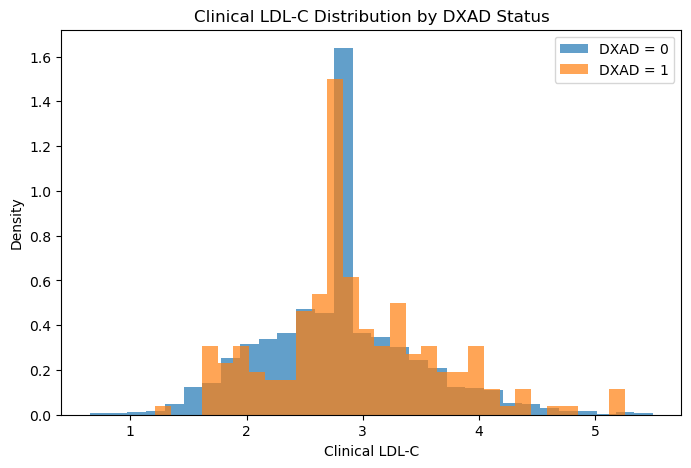

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df[df['DXAD'] == 0]['CLINICAL_LDL_C'], bins=30, alpha=0.7, label='DXAD = 0', density=True)
plt.hist(df[df['DXAD'] == 1]['CLINICAL_LDL_C'], bins=30, alpha=0.7, label='DXAD = 1', density=True)
plt.xlabel('Clinical LDL-C')
plt.ylabel('Density')
plt.title('Clinical LDL-C Distribution by DXAD Status')
plt.legend()
plt.show()

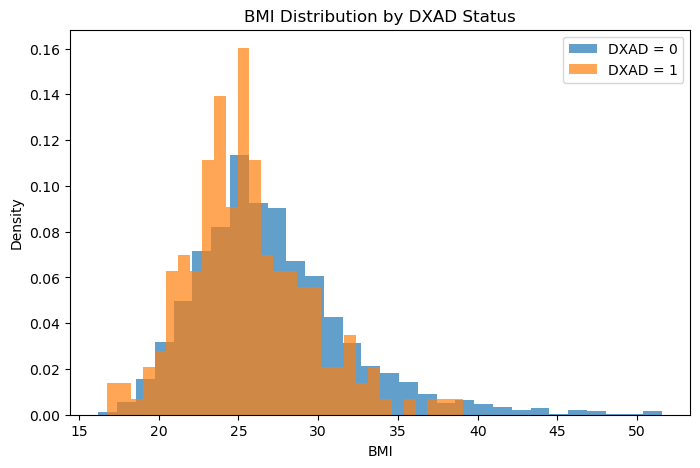

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df[df['DXAD'] == 0]['bmi'], bins=30, alpha=0.7, label='DXAD = 0', density=True)
plt.hist(df[df['DXAD'] == 1]['bmi'], bins=30, alpha=0.7, label='DXAD = 1', density=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution by DXAD Status')
plt.legend()
plt.show()

In [2]:
df.columns

Index(['RID', 'GDTOTAL', 'MH14BALCH', 'MH16BSMOK', 'AGE', 'PTGENDER',
       'PTEDUCAT', 'HMHYPERT', 'DXAD', 'CLINICAL_LDL_C', 'bmi', 'apoe_2/2',
       'apoe_2/3', 'apoe_2/4', 'apoe_3/3', 'apoe_3/4', 'apoe_4/4'],
      dtype='object')

In [12]:
df['NPFTDT7'].value_counts()

NPFTDT7
0    57
.    52
1     1
Name: count, dtype: int64

In [ ]:
import numpy as np
df['DXAD'].replace({np.nan: 0, 1: 1, -4.0: 0}, inplace=True)
df['MH14BALCH'].replace({np.nan: 0, -4.0: 0}, inplace=True)
df['MH16BSMOK'].replace({np.nan: 0, -4.0: 0}, inplace=True)
df['GDTOTAL'].fillna(0)
df['GDTOTAL'] = df['GDTOTAL'].apply(lambda x: 0 if x < 4 else 1 if x >= 4 else x)
df['VSHEIGHT'].replace({-4.0: np.nan, -1.0: np.nan}, inplace=True)
df['VSWEIGHT'].replace({-1.0:np.nan, -4.0: np.nan}, inplace=True)
df['PTGENDER'].replace({'Male':0, 'Female':1}, inplace=True)
df['NPPDXI'].replace({8:np.nan, 9:np.nan}, inplace=True)

df.dropna(subset=['AGE', 'PTGENDER', 'VSWEIGHT', 'VSHEIGHT'], inplace=True)
df['CLINICAL_LDL_C'].fillna(df['CLINICAL_LDL_C'].mean(), inplace=True)



/tmp/ipykernel_4140907/3358032046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DXAD'].replace({np.nan: 0, 1: 1, -4.0: 0}, inplace=True)
/tmp/ipykernel_4140907/3358032046.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [5]:
# height
df.loc[df['VSHEIGHT'] > 125, 'VSHEIGHT'] = df.loc[df['VSHEIGHT'] > 125, 'VSHEIGHT'] / 2.54 #cm
df.loc[df['VSHEIGHT'] < 2, 'VSHEIGHT'] = (df.loc[df['VSHEIGHT'] < 2, 'VSHEIGHT'] * 100) / 2.54 # meters

# weight
df.loc[df['VSWTUNIT'] == 2, 'VSWEIGHT'] = df.loc[df['VSWTUNIT'] == 2, 'VSWEIGHT'] * 2.2

df['bmi'] = 703 * (df['VSWEIGHT'] / (df['VSHEIGHT'] ** 2))

In [6]:
df.drop(columns=['VSWEIGHT', 'VSHEIGHT', 'VSWTUNIT', "VSHTUNIT", 'PTETHCAT'], inplace=True, errors='ignore')

In [7]:
import sys
sys.path.append('../ukb')  # adjust the path as needed
from doubleml_utils import encode

df = encode(df, 'GENOTYPE', 'apoe')
df.drop(columns=['GENOTYPE'], inplace=True)

In [8]:
df.to_parquet('ADNI_cleaned.parquet', engine='fastparquet', index=False)